In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('churn_preprocess_data.csv')

In [3]:
dataset

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Bank transfer,Credit card,Electronic check,Mailed check,Month-to-month,One year,...,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,0,5,27.43,137.15,No,Yes,No,No,Yes,No,...,Yes,No,No,Yes,No,No,No,No,Yes,Yes
1,0,42,38.28,1607.76,No,No,Yes,No,No,No,...,No,Yes,Yes,Yes,No,No,No,No,No,Yes
2,0,61,106.44,6492.84,Yes,No,No,No,No,Yes,...,No,No,No,Yes,No,Yes,Yes,No,No,Yes
3,1,22,92.49,2034.78,No,No,Yes,No,Yes,No,...,No,No,No,No,Yes,No,No,Yes,No,No
4,1,21,19.63,412.23,Yes,No,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,61,42.52,2593.72,No,No,Yes,No,No,Yes,...,Yes,Yes,No,No,Yes,No,No,No,Yes,No
296,0,49,22.31,1093.19,No,No,No,Yes,Yes,No,...,No,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes
297,0,71,59.57,4229.47,No,No,No,Yes,No,No,...,Yes,Yes,No,No,Yes,Yes,No,Yes,No,Yes
298,1,1,31.32,31.32,No,Yes,No,No,No,No,...,Yes,No,Yes,No,No,No,Yes,Yes,No,No


In [4]:
dataset.isnull().sum()

SeniorCitizen       0
tenure              0
MonthlyCharges      0
TotalCharges        0
Bank transfer       0
Credit card         0
Electronic check    0
Mailed check        0
Month-to-month      0
One year            0
Two year            0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
Churn               0
dtype: int64

In [5]:
# Number of rows and Columns 
print("The Number of Row:",dataset.shape[0])
print("The Number of Column",dataset.shape[1])

The Number of Row: 300
The Number of Column 25


# Univariate Analysis Questions 

C:\Users\anandha rishi\anaconda3\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


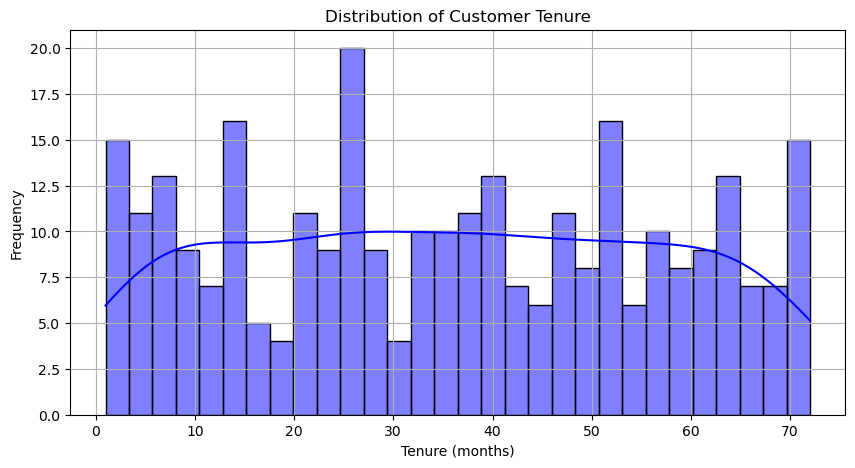

count    300.000000
mean      35.783333
std       21.113400
min        1.000000
25%       17.000000
50%       36.000000
75%       53.250000
max       72.000000
Name: tenure, dtype: float64


In [6]:
# Plot the distribution of customer tenure
plt.figure(figsize=(10, 5))
sns.histplot(dataset["tenure"], bins=30, kde=True, color="blue")
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency")
plt.title("Distribution of Customer Tenure")
plt.grid(True)
plt.show()

# Basic statistics of tenure
print(dataset["tenure"].describe())

In [7]:
# Calculate the average MonthlyCharges
avg_monthly_charges = dataset["MonthlyCharges"].mean()

print(f"Average Monthly Charges: {avg_monthly_charges:.2f}")

Average Monthly Charges: 67.23


In [8]:
# Count the number of Senior Citizens
senior_citizen_count = dataset[dataset["SeniorCitizen"] == 1].shape[0]

print(f"Number of Senior Citizens: {senior_citizen_count}")

Number of Senior Citizens: 163


In [9]:
# Calculate the percentage of customers with PaperlessBilling
paperless_count = dataset[dataset["PaperlessBilling"] == "Yes"].shape[0]
total_customers = dataset.shape[0]

percentage_paperless = (paperless_count / total_customers) * 100

print(f"Percentage of customers with PaperlessBilling: {percentage_paperless:.2f}%")

Percentage of customers with PaperlessBilling: 54.67%


In [10]:
# Find the most common InternetService type
most_common_service = dataset["InternetService"].mode()[0]

print(f"Most common InternetService type: {most_common_service}")

Most common InternetService type: Yes


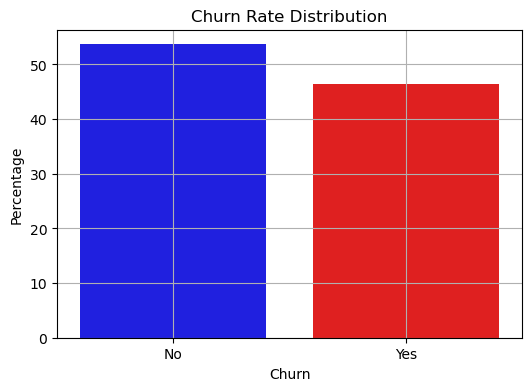

Churn
No     53.666667
Yes    46.333333
Name: proportion, dtype: float64


In [11]:
# Count the churn values
churn_counts = dataset["Churn"].value_counts(normalize=True) * 100

# Plot the Churn distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["blue", "red"])
plt.xlabel("Churn")
plt.ylabel("Percentage")
plt.title("Churn Rate Distribution")
plt.grid(True)
plt.show()

# Print churn percentages
print(churn_counts)

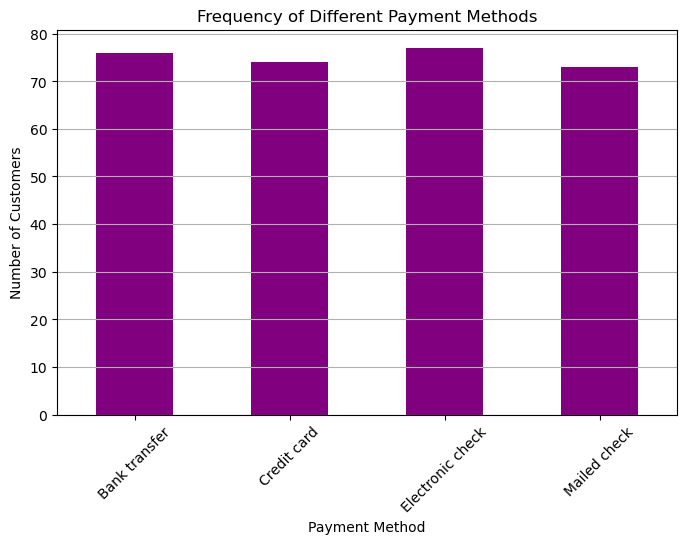

Bank transfer       76
Credit card         74
Electronic check    77
Mailed check        73
dtype: int64


In [12]:
# Extract payment method columns
payment_methods = ["Bank transfer", "Credit card", "Electronic check", "Mailed check"]

# Count customers for each payment method
payment_counts = dataset[payment_methods].apply(lambda x: (x == "Yes").sum())

# Plot the frequency of payment methods
plt.figure(figsize=(8, 5))
payment_counts.plot(kind="bar", color="purple")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.title("Frequency of Different Payment Methods")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Print payment method counts
print(payment_counts)

Most common contract type: Month-to-month


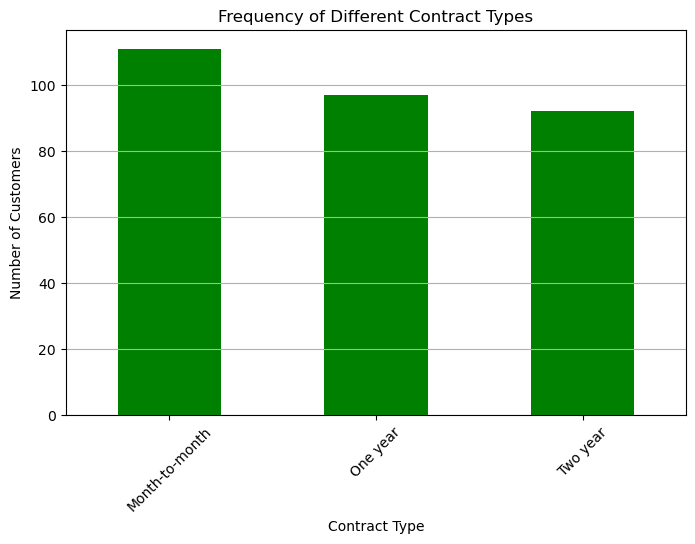

Month-to-month    111
One year           97
Two year           92
dtype: int64


In [13]:
# Extract contract type columns
contract_types = ["Month-to-month", "One year", "Two year"]

# Count customers for each contract type
contract_counts = dataset[contract_types].apply(lambda x: (x == "Yes").sum())

# Find the most common contract type
most_common_contract = contract_counts.idxmax()

print(f"Most common contract type: {most_common_contract}")

plt.figure(figsize=(8, 5))
contract_counts.plot(kind="bar", color="green")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.title("Frequency of Different Contract Types")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Print payment method counts
print(contract_counts)

In [14]:
# Calculate the proportion of customers with TechSupport enabled
tech_support_count = dataset[dataset["TechSupport"] == "Yes"].shape[0]
total_customers = dataset.shape[0]

tech_support_percentage = (tech_support_count / total_customers) * 100

print(f"Proportion of customers with TechSupport enabled: {tech_support_percentage:.2f}%")

Proportion of customers with TechSupport enabled: 34.00%


C:\Users\anandha rishi\anaconda3\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


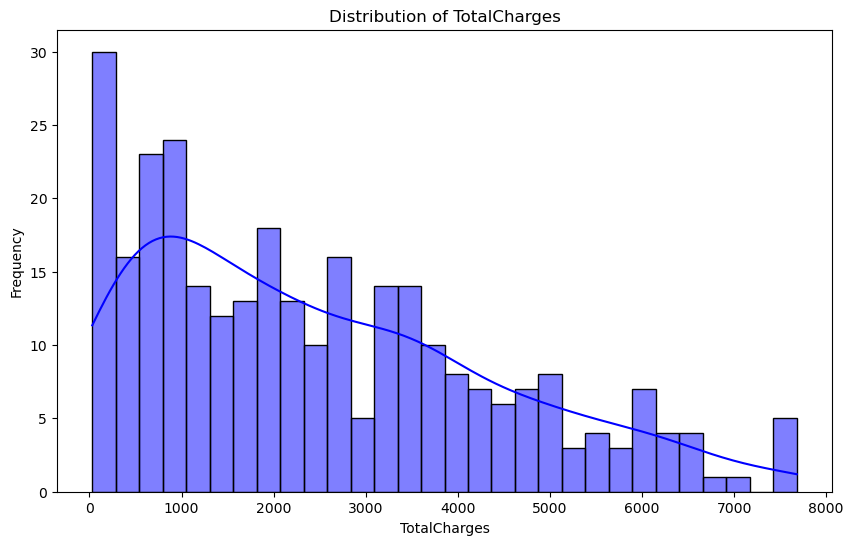

In [15]:
# Plotting the distribution of TotalCharges
plt.figure(figsize=(10, 6))
sns.histplot(dataset['TotalCharges'], bins=30, kde=True, color='blue')
plt.title('Distribution of TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis Questions (10)

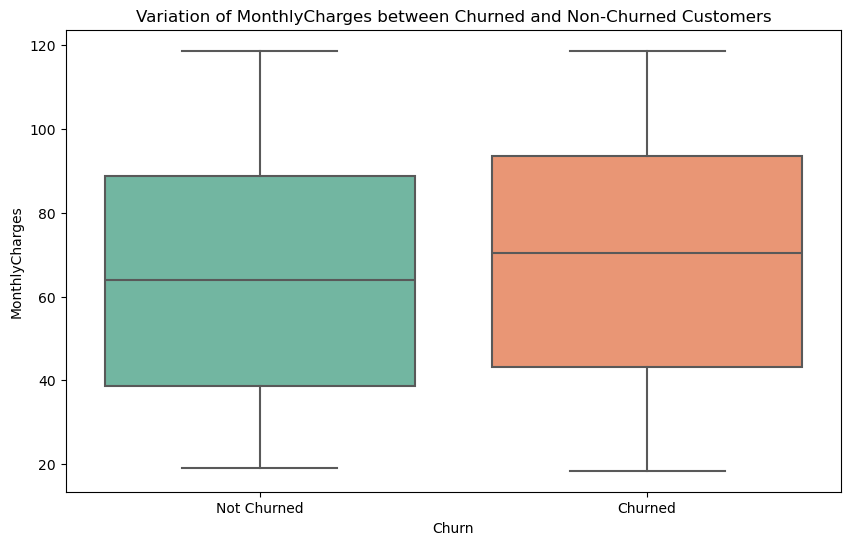

In [16]:
# Assuming 'Churn' column contains 1 for churned and 0 for not churned
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=dataset, palette="Set2")
plt.title('Variation of MonthlyCharges between Churned and Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

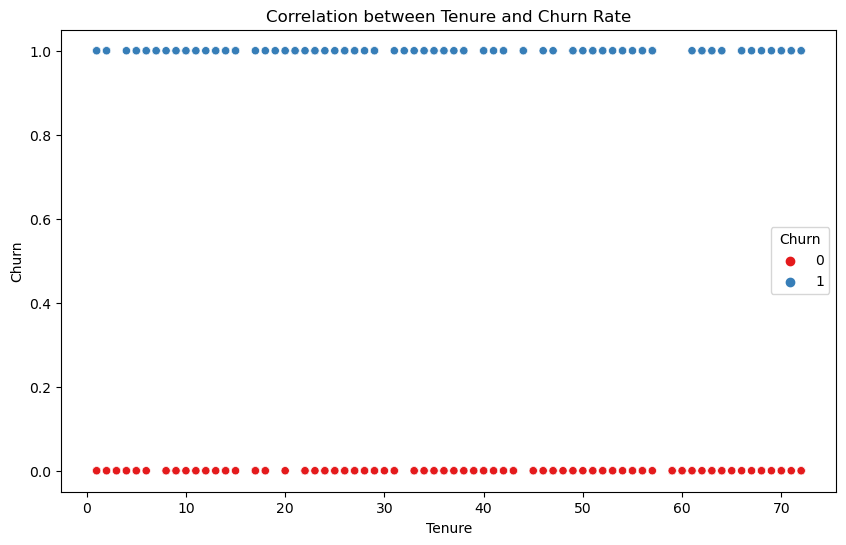

Correlation coefficient between Tenure and Churn: -0.07924718040346172


In [17]:
# Convert 'Churn' to numeric (1 for 'Yes' and 0 for 'No')
dataset['Churn'] = dataset['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Scatter plot to check correlation between Tenure and Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='Churn', data=dataset, hue='Churn', palette='Set1')
plt.title('Correlation between Tenure and Churn Rate')
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.show()

# Correlation coefficient
correlation = dataset['tenure'].corr(dataset['Churn'])
print(f"Correlation coefficient between Tenure and Churn: {correlation}")

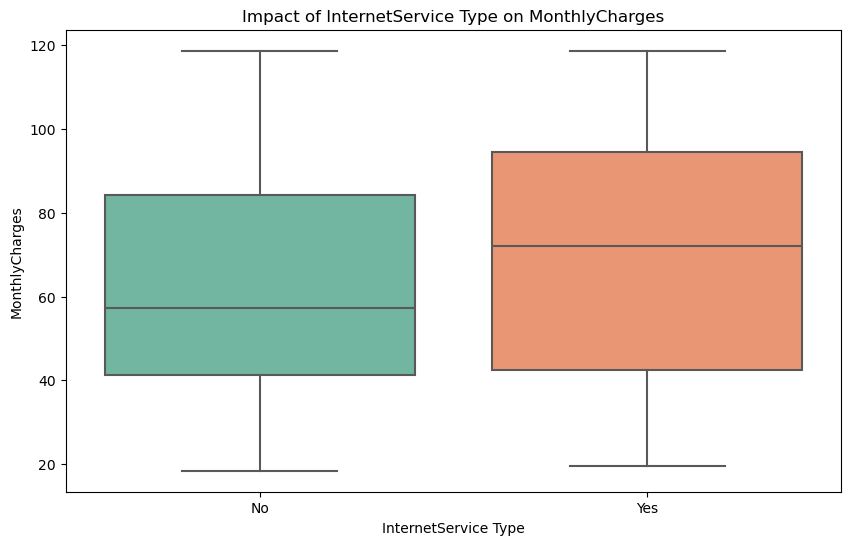

In [18]:
# Box plot to compare MonthlyCharges by InternetService type
plt.figure(figsize=(10, 6))
sns.boxplot(x='InternetService', y='MonthlyCharges', data=dataset, palette="Set2")
plt.title('Impact of InternetService Type on MonthlyCharges')
plt.xlabel('InternetService Type')
plt.ylabel('MonthlyCharges')
plt.show()

Churn rate for Senior Citizens: 0.43558282208588955
Churn rate for Non-Senior Citizens: 0.49635036496350365


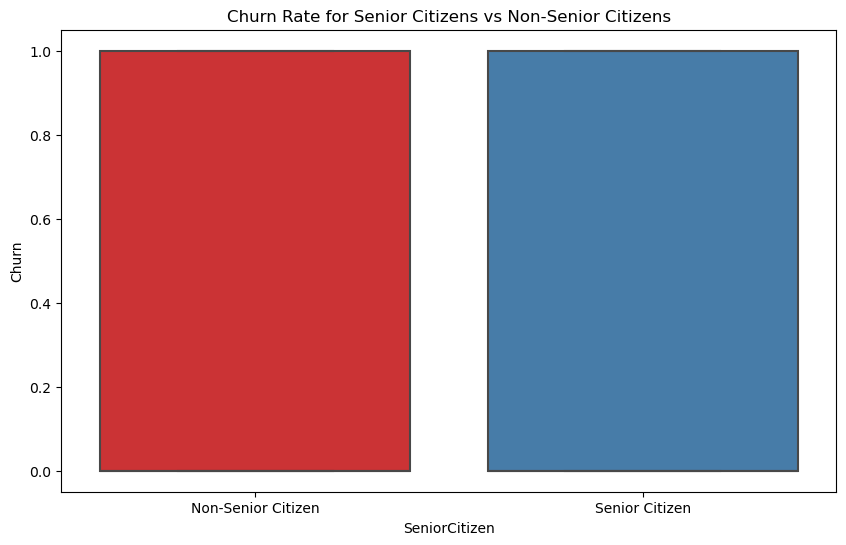

In [19]:
# Calculate churn rate for Senior Citizens and non-Senior Citizens
churn_rate = dataset.groupby('SeniorCitizen')['Churn'].mean()

print(f"Churn rate for Senior Citizens: {churn_rate[1]}")
print(f"Churn rate for Non-Senior Citizens: {churn_rate[0]}")

# Box plot to compare churn rate between Senior Citizens and non-Senior Citizens
plt.figure(figsize=(10, 6))
sns.boxplot(x='SeniorCitizen', y='Churn', data=dataset, palette="Set1")
plt.title('Churn Rate for Senior Citizens vs Non-Senior Citizens')
plt.xlabel('SeniorCitizen')
plt.ylabel('Churn')
plt.xticks([0, 1], ['Non-Senior Citizen', 'Senior Citizen'])
plt.show()

In [20]:
import pandas as pd
from scipy.stats import chi2_contingency

# CSV file read pannurathu
#file_path = "churn_preprocess_data.csv"
#df = pd.read_csv(file_path)

# Contract type & Churn check panna crosstab create pannurathu
contingency_table = pd.crosstab(dataset['One year'], dataset['Churn'])

# Chi-square test run pannurathu
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Result print
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Contract type significantly influences customer churn.")
else:
    print("Contract type does not significantly influence customer churn.")

Chi-square statistic: 0.0
P-value: 1.0
Contract type does not significantly influence customer churn.


In [21]:
# PaymentMethod & Churn check panna crosstab create pannurathu
contingency_table = pd.crosstab(dataset['Bank transfer'], dataset['Churn'])

# Chi-square test run pannurathu
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Result print
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("PaymentMethod significantly influences customer churn.")
else:
    print("PaymentMethod does not significantly influence customer churn.")

Chi-square statistic: 0.3705673904812078
P-value: 0.5426951540671499
PaymentMethod does not significantly influence customer churn.


In [22]:
# TechSupport & Churn check panna crosstab create pannurathu
contingency_table = pd.crosstab(dataset['TechSupport'], dataset['Churn'])

# Chi-square test run pannurathu
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Result print
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("TechSupport subscription significantly influences customer churn.")
else:
    print("TechSupport subscription does not significantly influence customer churn.")

Chi-square statistic: 0.844565653485781
P-value: 0.3580942479275273
TechSupport subscription does not significantly influence customer churn.


In [23]:
# PaperlessBilling 'Yes' and 'No' group split
from scipy.stats import ttest_ind
group_yes = dataset[dataset['PaperlessBilling'] == 'Yes']['TotalCharges']
group_no = dataset[dataset['PaperlessBilling'] == 'No']['TotalCharges']

# Independent t-test run pannurathu
t_stat, p_value = ttest_ind(group_yes, group_no, equal_var=False)

# Result print
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("TotalCharges significantly differs between customers with and without PaperlessBilling.")
else:
    print("No significant difference in TotalCharges between customers with and without PaperlessBilling.")

T-statistic: 0.07307470549052711
P-value: 0.9417978159117557
No significant difference in TotalCharges between customers with and without PaperlessBilling.
